# Business Description

Over the last decade, there has been immense growth in the number of airline industries around the globe which has provided the passengers a plethora of options to choose from. Passengers have the ability to access the features, convenience, prices, services and a lot of other key factors along with providing their rating to the airline services they have experienced. To keep themselves abreast of the competition, airlines need to know how to maximize their potential. Passenger satisfaction plays a major role when it comes to identifying the important factors which affects the productivity and overall turnover. In this report, we have analyzed the features pertaining to more satisfied airline passengers and compared the results obtained by various machine learning algorithms to achieve the best performance.

## Import the libraries Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from collections import Counter
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

C:\Users\sonal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Loading & Cleaning

In [2]:
df_train = pd.read_csv('C:\\Durham College AI Algo\\AI Algo\\Final Project\\datasets\\train.csv')
df_test = pd.read_csv('C:\\Durham College AI Algo\\AI Algo\\Final Project\\datasets\\test.csv')

In [3]:
# Raw Data
df_train.columns

Index(['id', 'satisfaction', 'Gender', 'CustomerType', 'Age', 'TypeofTravel',
       'Class', 'FlightDistance', 'Seatcomfort',
       'DepartureArrivaltimeconvenient', 'Foodanddrink', 'Gatelocation',
       'Inflightwifiservice', 'Inflightentertainment', 'Inflightservice',
       'EaseofOnlinebooking', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Cleanliness', 'Onlineboarding',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')

As you can see Unnamed is the useless column so lets drop it.

In [4]:
df_train.head()

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
# Raw Data
df_train.head().transpose()

,0,1,2,3,4
id,11112,110278,103199,47462,120011
satisfaction,satisfied,satisfied,satisfied,satisfied,satisfied
Gender,Female,Male,Female,Female,Female
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70
TypeofTravel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco
FlightDistance,265,2464,2138,623,354
Seatcomfort,0,0,0,0,0
DepartureArrivaltimeconvenient,0,0,0,0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              129880 non-null  int64  
 1   satisfaction                    129880 non-null  object 
 2   Gender                          129880 non-null  object 
 3   CustomerType                    129880 non-null  object 
 4   Age                             129880 non-null  int64  
 5   TypeofTravel                    129880 non-null  object 
 6   Class                           129880 non-null  object 
 7   FlightDistance                  129880 non-null  int64  
 8   Seatcomfort                     129880 non-null  int64  
 9   DepartureArrivaltimeconvenient  129880 non-null  int64  
 10  Foodanddrink                    129880 non-null  int64  
 11  Gatelocation                    129880 non-null  int64  
 12  Inflightwifiserv

In [7]:
df_train.describe()

,id,Age,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [8]:
df_train.skew()

id                                0.000000
Age                              -0.003606
FlightDistance                    0.466748
Seatcomfort                      -0.091861
DepartureArrivaltimeconvenient   -0.252282
Foodanddrink                     -0.116813
Gatelocation                     -0.053064
Inflightwifiservice              -0.191123
Inflightentertainment            -0.604828
Inflightservice                  -0.575365
EaseofOnlinebooking              -0.491720
Onboardservice                   -0.505270
Legroomservice                   -0.496440
Baggagehandling                  -0.743037
Checkinservice                   -0.392442
Cleanliness                      -0.756001
Onlineboarding                   -0.366496
DepartureDelayinMinutes           6.821980
ArrivalDelayinMinutes             6.670125
dtype: float64

In [9]:
df_train.kurtosis()

id                                 -1.200000
Age                                -0.719140
FlightDistance                      0.364306
Seatcomfort                        -0.943193
DepartureArrivaltimeconvenient     -1.089371
Foodanddrink                       -0.986728
Gatelocation                       -1.089822
Inflightwifiservice                -1.121446
Inflightentertainment              -0.532786
Inflightservice                    -0.810572
EaseofOnlinebooking                -0.910654
Onboardservice                     -0.785023
Legroomservice                     -0.841321
Baggagehandling                    -0.237539
Checkinservice                     -0.793511
Cleanliness                        -0.208889
Onlineboarding                     -0.938050
DepartureDelayinMinutes           100.644546
ArrivalDelayinMinutes              95.117114
dtype: float64

<a id = "2"></a><br>
# Variable Description
1. id : Unique id number to each passenger.
2. Gender: Gender of the passengers (Female, Male)
3. Customer Type: The customer type (Loyal customer, disloyal customer)
4. Age: The actual age of the passengers
5. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
6. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
7. Flight distance: The flight distance of this journey
8. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
9. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
10. Ease of Online booking: Satisfaction level of online booking
11. Gate location: Satisfaction level of Gate location
12. Food and drink: Satisfaction level of Food and drink
13. Online boarding: Satisfaction level of online boarding
14. Seat comfort: Satisfaction level of Seat comfort
15. Inflight entertainment: Satisfaction level of inflight entertainment
16. On-board service: Satisfaction level of On-board service
17. Leg room service: Satisfaction level of Leg room service
18. Baggage handling: Satisfaction level of baggage handling
19. Check-in service: Satisfaction level of Check-in service
20. Inflight service: Satisfaction level of inflight service
21. Cleanliness: Satisfaction level of Cleanliness
22. Departure Delay in Minutes: Minutes delayed when departure
23. Arrival Delay in Minutes: Minutes delayed when Arrival
24. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              129880 non-null  int64  
 1   satisfaction                    129880 non-null  object 
 2   Gender                          129880 non-null  object 
 3   CustomerType                    129880 non-null  object 
 4   Age                             129880 non-null  int64  
 5   TypeofTravel                    129880 non-null  object 
 6   Class                           129880 non-null  object 
 7   FlightDistance                  129880 non-null  int64  
 8   Seatcomfort                     129880 non-null  int64  
 9   DepartureArrivaltimeconvenient  129880 non-null  int64  
 10  Foodanddrink                    129880 non-null  int64  
 11  Gatelocation                    129880 non-null  int64  
 12  Inflightwifiserv

* int64(18): id, Age,Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness and Departure Delay in Minutes.
* object(5): Gender, Customer Type, Type of Travel, Class and satisfaction.
* float64(1): Arrival Delay in Minutes.

# Exploratory Data Analysis

<a id = "3"></a><br>
# Univariate Variable Analysis

* Categorical Variables: Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness,Gender, Customer Type, Type of Travel, Class and satisfaction.
* Numerical Variables: id,Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

<a id = "4"></a><br>
## Categorical Variables

In [11]:
def bar_plot(variable):
    
    var=df_train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_Value))

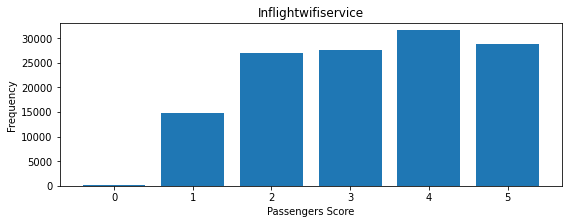

Inflightwifiservice:
4    31560
5    28830
3    27602
2    27045
1    14711
0      132
Name: Inflightwifiservice, dtype: int64


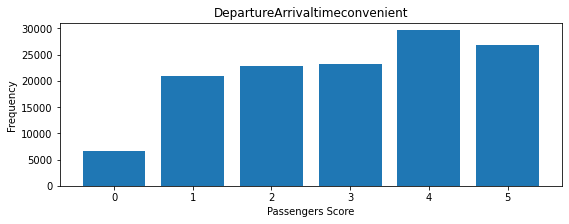

DepartureArrivaltimeconvenient:
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: DepartureArrivaltimeconvenient, dtype: int64


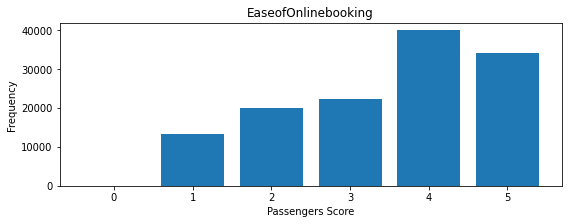

EaseofOnlinebooking:
4    39920
5    34137
3    22418
2    19951
1    13436
0       18
Name: EaseofOnlinebooking, dtype: int64


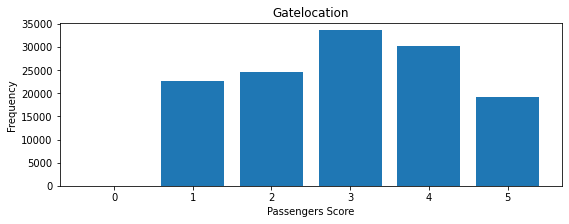

Gatelocation:
3    33546
4    30088
2    24518
1    22565
5    19161
0        2
Name: Gatelocation, dtype: int64


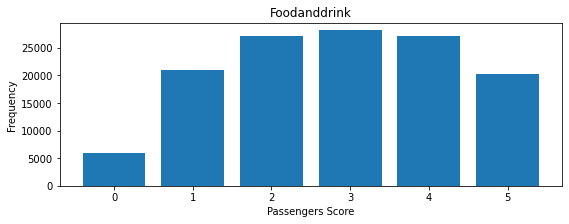

Foodanddrink:
3    28150
4    27216
2    27146
1    21076
5    20347
0     5945
Name: Foodanddrink, dtype: int64


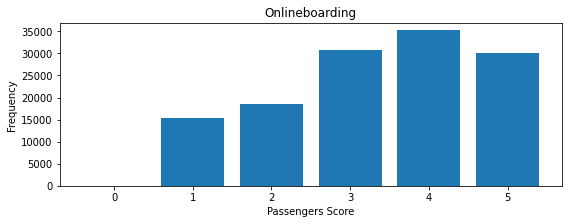

Onlineboarding:
4    35181
3    30780
5    29973
2    18573
1    15359
0       14
Name: Onlineboarding, dtype: int64


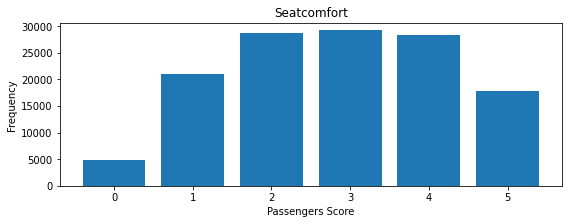

Seatcomfort:
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seatcomfort, dtype: int64


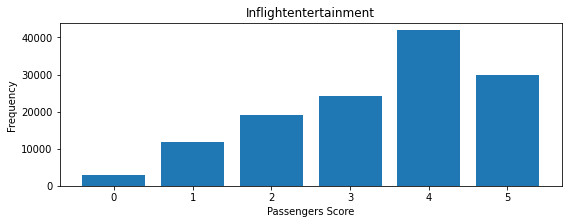

Inflightentertainment:
4    41879
5    29831
3    24200
2    19183
1    11809
0     2978
Name: Inflightentertainment, dtype: int64


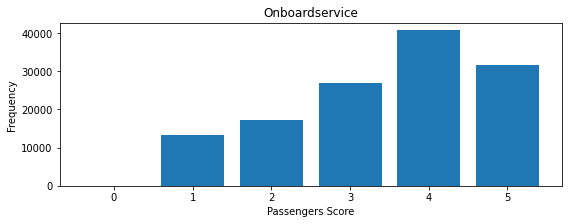

Onboardservice:
4    40675
5    31724
3    27037
2    17174
1    13265
0        5
Name: Onboardservice, dtype: int64


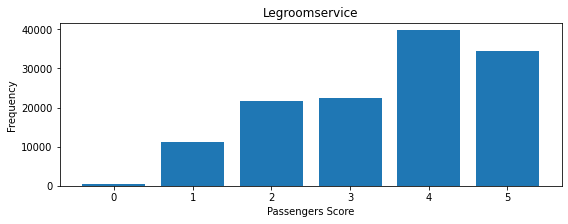

Legroomservice:
4    39698
5    34385
3    22467
2    21745
1    11141
0      444
Name: Legroomservice, dtype: int64


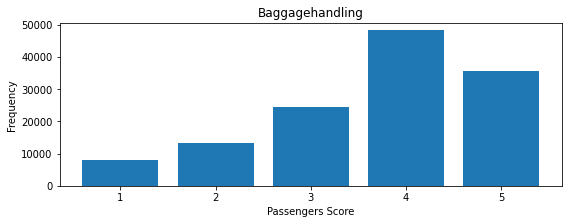

Baggagehandling:
4    48240
5    35748
3    24485
2    13432
1     7975
Name: Baggagehandling, dtype: int64


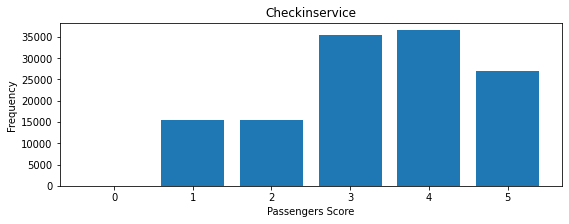

Checkinservice:
4    36481
3    35538
5    27005
2    15486
1    15369
0        1
Name: Checkinservice, dtype: int64


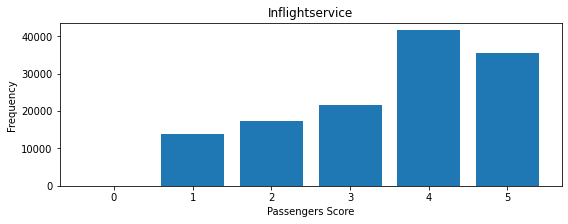

Inflightservice:
4    41510
5    35563
3    21609
2    17260
1    13937
0        1
Name: Inflightservice, dtype: int64


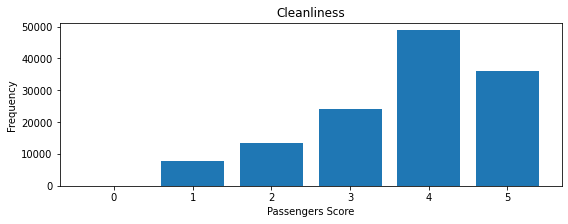

Cleanliness:
4    48795
5    35916
3    23984
2    13412
1     7768
0        5
Name: Cleanliness, dtype: int64


In [13]:
category1=["Inflightwifiservice", "DepartureArrivaltimeconvenient", "EaseofOnlinebooking", "Gatelocation", "Foodanddrink", "Onlineboarding", "Seatcomfort", "Inflightentertainment", "Onboardservice", "Legroomservice", "Baggagehandling", "Checkinservice", "Inflightservice", "Cleanliness",]
for c in category1:
    bar_plot(c)

The visualizations above are showing us the frequency distribution between different categorical features and also giving us the count or frequency of the features in written after every individual visualization.

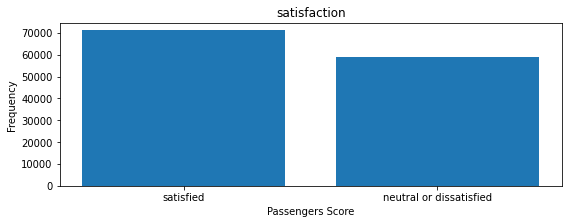

satisfaction:
satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction, dtype: int64


In [14]:
bar_plot("satisfaction")

In [16]:
category2=["Gender", "CustomerType", "TypeofTravel", "Class","satisfaction"]
for c in category2:
    print("{} \n".format(df_train[c].value_counts()))

Female    65899
Male      63981
Name: Gender, dtype: int64 

Loyal Customer       106100
disloyal Customer     23780
Name: CustomerType, dtype: int64 

Business travel    89693
Personal Travel    40187
Name: TypeofTravel, dtype: int64 

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64 

satisfied                  71087
neutral or dissatisfied    58793
Name: satisfaction, dtype: int64 



The above print statements giving us the information about the number of passengers in different categorical features.

<a id = "5"></a><br>
## Numerical Variable

In [17]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(df_train[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

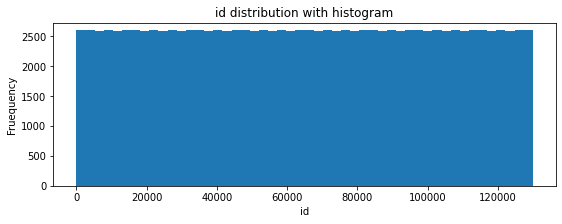

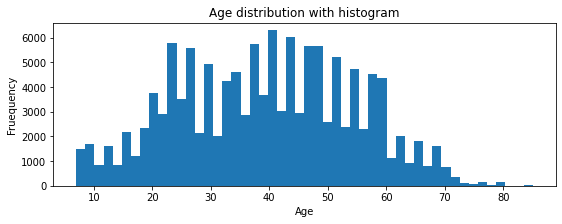

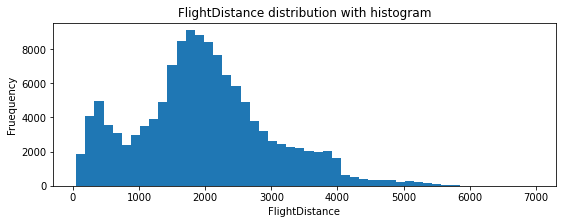

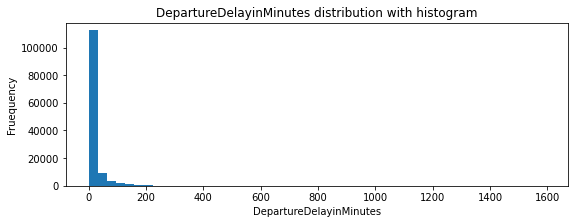

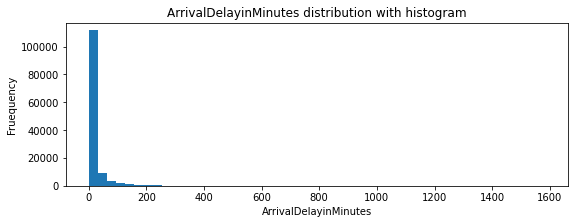

In [18]:
numericVar=["id","Age", "FlightDistance", "DepartureDelayinMinutes", "ArrivalDelayinMinutes"]
for n in numericVar:
    plot_hist(n)

The above visualizations showing us the distribution in different numerical columns.

## Data Cleaning 

1. Use the numerical variables to find some object properties in the data.
2. Satisfaction variable is the response variable so we are making it numeric as follows=> 
   0: neutral or dissatisfied
   1: satisfied

In [19]:
df_train.columns=[each.replace(" ","_") for each in df_train.columns]

In [20]:
df_train.head().transpose()

,0,1,2,3,4
id,11112,110278,103199,47462,120011
satisfaction,satisfied,satisfied,satisfied,satisfied,satisfied
Gender,Female,Male,Female,Female,Female
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70
TypeofTravel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco
FlightDistance,265,2464,2138,623,354
Seatcomfort,0,0,0,0,0
DepartureArrivaltimeconvenient,0,0,0,0,0


In [21]:
df_train["satisfaction"]=[1 if each=="satisfied" else 0 for each in df_train.satisfaction]

In [22]:
df_train.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,11112,110278,103199,47462,120011,100744,32838,32864,53786,7243
satisfaction,1,1,1,1,1,1,1,1,1,1
Gender,Female,Male,Female,Female,Female,Male,Female,Male,Female,Male
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70,30,66,10,56,22
TypeofTravel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco,Eco,Eco,Eco,Business,Eco
FlightDistance,265,2464,2138,623,354,1894,227,1812,73,1556
Seatcomfort,0,0,0,0,0,0,0,0,0,0
DepartureArrivaltimeconvenient,0,0,0,0,0,0,0,0,0,0


* Now let's look at the effect of some features on satisfaction

* Gender --> satisfaction
* Age --> satisfaction
* Type_of_Travel --> satisfaction
* Class --> satisfaction
* Customer_Type --> satisfaction
* Cleanliness --> satisfaction
* Inflight_wifi_service --> satisfaction
* Inflight_entertainment --> satisfaction
* Food_and_drink --> satisfaction
* Seat_comfort --> satisfaction

In [23]:
# Gender vs satisfaction
df_train[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Gender,satisfaction
0,Female,0.651421
1,Male,0.440115


* Satisfaction rate of male passengers 44%, satification rate of female passenger 65%

In [24]:
# Age vs satisfaction
df_train[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Age,satisfaction
44,51,0.689391
46,53,0.688683
39,46,0.682786
34,41,0.681127
45,52,0.671412
...,...,...
73,80,0.281818
72,79,0.269231
64,71,0.254386
74,85,0.240000


* The most satisfied age group 46-56.

In [25]:
# Type_of_Travel vs satisfaction
df_train[["TypeofTravel","satisfaction"]].groupby(["TypeofTravel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,TypeofTravel,satisfaction
0,Business travel,0.583724
1,Personal Travel,0.466096


* 58% of passengers traveling on business are satisfied, 46% of passengers traveling on personal are satisfied. It's interesting statistic.

In [26]:
# Class vs satisfaction
df_train[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
0,Business,0.709379
2,Eco Plus,0.427053
1,Eco,0.393987


* 71% of passengers on business class are satisfied, 43% of passengers on eco plus class are satisfied, 39% of passengers on eco class are satisfied.

In [28]:
# Customer_Type vs satisfaction
df_train[["CustomerType","satisfaction"]].groupby(["CustomerType"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,CustomerType,satisfaction
0,Loyal Customer,0.616277
1,disloyal Customer,0.239697


* As it is obvious that Loyal Customers are most satisfied than the disloyal customers.

In [29]:
# Cleanliness vs satisfaction
df_train[["Cleanliness","satisfaction"]].groupby(["Cleanliness"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Cleanliness,satisfaction
5,5,0.731485
4,4,0.586720
2,2,0.404638
1,1,0.403321
3,3,0.317962
0,0,0.000000


* Most of the passengers who give 5 points to cleanliness are satisfied with the flight.

In [30]:
# Inflight_wifi_service vs satisfaction
df_train[["Inflightwifiservice","satisfaction"]].groupby(["Inflightwifiservice"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflightwifiservice,satisfaction
5,5,0.669233
4,4,0.638054
3,3,0.509637
2,2,0.502163
0,0,0.446970
1,1,0.268439


* Most of the passengers who give 0 to wifi service on the plane are satisfied with the flight. It seems that wifi service is not that important.

In [32]:
# Inflight_entertainment vs satisfaction
df_train[["Inflightentertainment","satisfaction"]].groupby(["Inflightentertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflightentertainment,satisfaction
5,5,0.952063
4,4,0.719931
0,0,0.660175
1,1,0.210348
3,3,0.198967
2,2,0.170516


* There is a standard distribution in flight entertainment.

In [33]:
# Food_and_drink vs satisfaction
df_train[["Foodanddrink","satisfaction"]].groupby(["Foodanddrink"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Foodanddrink,satisfaction
5,5,0.780164
0,0,0.779310
4,4,0.590204
1,1,0.508398
2,2,0.432476
3,3,0.428490


* 20% of the passengers who do not like the food are satisfied with the flight.

In [34]:
# Seat_comfort vs satisfaction
df_train[["Seatcomfort","satisfaction"]].groupby(["Seatcomfort"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Seatcomfort,satisfaction
0,0,0.997915
5,5,0.992091
4,4,0.651701
1,1,0.450905
2,2,0.357585
3,3,0.355995


* There are many people who gave the seat comfort 0 points.

# Outlier Detection
* Outlier detection is very important for the correct operation of the model when installing the model.

In [35]:
numerical_features = df_train.select_dtypes(exclude=['object']).drop(["satisfaction"],axis=1).copy()
numerical_features.columns

Index(['id', 'Age', 'FlightDistance', 'Seatcomfort',
       'DepartureArrivaltimeconvenient', 'Foodanddrink', 'Gatelocation',
       'Inflightwifiservice', 'Inflightentertainment', 'Inflightservice',
       'EaseofOnlinebooking', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Cleanliness', 'Onlineboarding',
       'DepartureDelayinMinutes', 'ArrivalDelayinMinutes'],
      dtype='object')

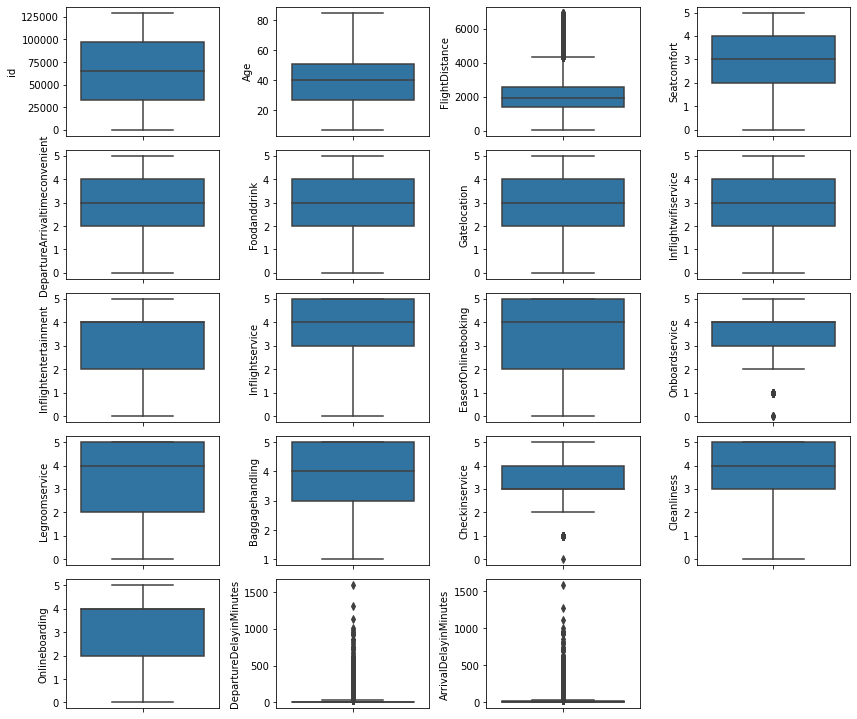

In [36]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

In [37]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        # 1st quartile
        Q1=np.percentile(df[c],25)
        
        # 3rd quartile
        Q3=np.percentile(df[c],75)
        
        # IQR
        IQR= Q3-Q1
        
        # Outlier Step
        outlier_step= IQR * 1.5
        
        # Detect outlier and their indeces 
        outlier_list_col = df[(df[c]< Q1 - outlier_step)|( df[c] > Q3 + outlier_step)].index
        
        # Store indices 
        outlier_indices.extend(outlier_list_col)
    
    outliers_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i , v in outliers_indices.items() if v>2 )
    return multiple_outliers

In [38]:
df_train.loc[detect_outliers(df_train,[ 'Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice',
       'Cleanliness', 'DepartureDelayinMinutes',
       'ArrivalDelayinMinutes'])]

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
7239,38566,0,Female,Loyal Customer,55,Personal Travel,Eco,4338,1,5,...,4,1,1,4,5,4,4,4,176,160.0
21607,80183,0,Male,Loyal Customer,36,Personal Travel,Eco,4438,3,2,...,3,1,1,4,3,3,4,3,122,184.0
22092,58709,0,Female,Loyal Customer,58,Personal Travel,Eco Plus,5945,3,2,...,5,3,1,3,3,5,2,5,60,54.0
22692,66787,0,Female,Loyal Customer,64,Personal Travel,Eco,5603,3,3,...,1,2,2,2,2,1,5,1,358,369.0
23003,125475,0,Male,Loyal Customer,69,Personal Travel,Eco,4692,3,3,...,3,4,1,3,4,3,2,3,181,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123424,6927,1,Female,Loyal Customer,38,Business travel,Eco Plus,1456,5,1,...,5,5,1,1,5,1,2,5,41,82.0
123567,12884,1,Male,Loyal Customer,36,Business travel,Eco,1703,5,4,...,5,5,1,5,4,1,3,5,64,57.0
127460,49417,1,Female,Loyal Customer,32,Business travel,Business,4041,4,1,...,5,5,1,4,4,1,3,5,34,26.0
128995,39574,1,Male,Loyal Customer,40,Business travel,Eco,1938,5,2,...,5,5,1,3,4,1,4,5,105,98.0


In [39]:
# drop outliers
df_train = df_train.drop(detect_outliers(df_train,[ 'Age', 'FlightDistance', 'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice',
       'Cleanliness', 'DepartureDelayinMinutes',
       'ArrivalDelayinMinutes']),axis = 0).reset_index(drop = True)

In [40]:
df_train.head().transpose()

,0,1,2,3,4
id,11112,110278,103199,47462,120011
satisfaction,1,1,1,1,1
Gender,Female,Male,Female,Female,Female
CustomerType,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,65,47,15,60,70
TypeofTravel,Personal Travel,Personal Travel,Personal Travel,Personal Travel,Personal Travel
Class,Eco,Business,Eco,Eco,Eco
FlightDistance,265,2464,2138,623,354
Seatcomfort,0,0,0,0,0
DepartureArrivaltimeconvenient,0,0,0,0,0


# Missing Value
* Find Missing Value
* Fill Missing Value

In [41]:
df_test.columns=[each.replace(" ","_") for each in df_test.columns]
df_test["satisfaction"]=[1 if each=="satisfied" else 0 for each in df_test.satisfaction]

In [42]:
df_train.shape

(129234, 24)

In [43]:
df_train_len=len(df_train)
df_train= pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

In [44]:
df_train.head()

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,11112,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Find Missing Value

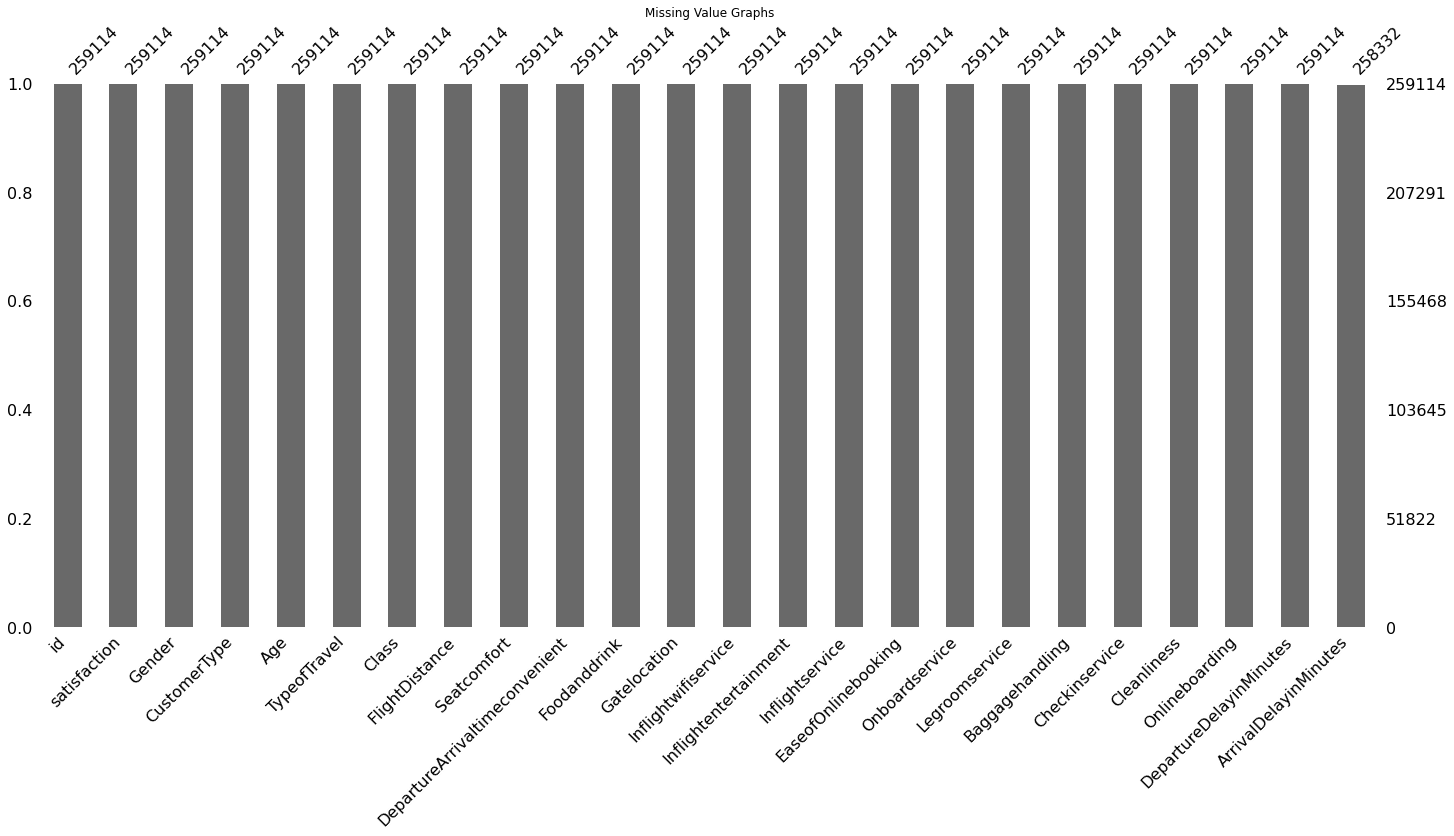

In [45]:
msno.bar(df_train)
plt.title("Missing Value Graphs")
plt.show()

* In the missing value chart, the only shortcoming is in Arrival_Delay_in_Munites

In [46]:
df_train.columns[df_train.isnull().any()]

Index(['ArrivalDelayinMinutes'], dtype='object')

In [47]:
df_train.isnull().sum()

id                                  0
satisfaction                        0
Gender                              0
CustomerType                        0
Age                                 0
TypeofTravel                        0
Class                               0
FlightDistance                      0
Seatcomfort                         0
DepartureArrivaltimeconvenient      0
Foodanddrink                        0
Gatelocation                        0
Inflightwifiservice                 0
Inflightentertainment               0
Inflightservice                     0
EaseofOnlinebooking                 0
Onboardservice                      0
Legroomservice                      0
Baggagehandling                     0
Checkinservice                      0
Cleanliness                         0
Onlineboarding                      0
DepartureDelayinMinutes             0
ArrivalDelayinMinutes             782
dtype: int64

## Fill Missing Value
* Arrival_Delay_in_Minutes has 782 missing value
* Since we do not know the flight delay time, we will fill the nan values with the average flight delay time.

In [49]:
np.mean(df_train["ArrivalDelayinMinutes"])

14.928978988278649

In [50]:
df_train[df_train["ArrivalDelayinMinutes"].isnull()]

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
145,61021,1,Female,Loyal Customer,21,Personal Travel,Eco,4804,0,2,...,5,5,4,1,4,2,3,5,20,NaN
246,40480,1,Male,Loyal Customer,28,Personal Travel,Eco,1364,0,3,...,4,2,1,1,3,4,3,2,0,NaN
709,19597,1,Male,Loyal Customer,28,Personal Travel,Eco,1792,0,5,...,5,5,4,4,5,3,4,5,24,NaN
735,5411,1,Male,Loyal Customer,9,Personal Travel,Eco,1862,0,5,...,3,3,5,3,4,4,4,3,0,NaN
817,3711,0,Male,Loyal Customer,9,Personal Travel,Eco,1668,1,0,...,4,4,4,5,1,5,1,4,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256691,125075,1,Female,Loyal Customer,41,Business travel,Business,3758,5,1,...,5,1,5,5,5,4,5,5,23,NaN
256892,75644,1,Female,Loyal Customer,60,Business travel,Business,3041,4,3,...,5,3,5,5,5,4,3,5,0,NaN
257179,40434,1,Male,Loyal Customer,44,Business travel,Business,3383,4,2,...,5,3,5,5,5,5,4,2,70,NaN
257571,120101,1,Male,Loyal Customer,39,Business travel,Business,1576,5,4,...,5,4,5,5,5,3,5,4,0,NaN


In [51]:
df_train.shape

(259114, 24)

In [52]:
df_train["ArrivalDelayinMinutes"]=df_train["ArrivalDelayinMinutes"].fillna(np.mean(df_train["ArrivalDelayinMinutes"]))

In [53]:
df_train[df_train["ArrivalDelayinMinutes"].isnull()]

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes


# Statistical Analysis

## Correlation Matrix

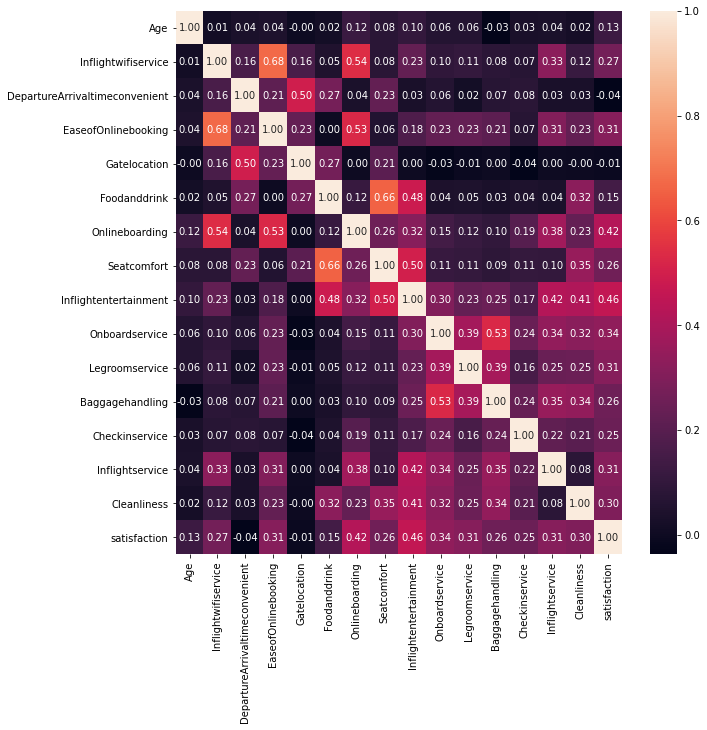

In [54]:
plt.figure(figsize=(10,10))
list1=["Age",'Inflightwifiservice',
       'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking',
       'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort',
       'Inflightentertainment', 'Onboardservice', 'Legroomservice',
       'Baggagehandling', 'Checkinservice', 'Inflightservice',
       'Cleanliness',"satisfaction"]
sns.heatmap(df_train[list1].corr(),annot=True,fmt=".2f")
plt.show()

## Gender-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


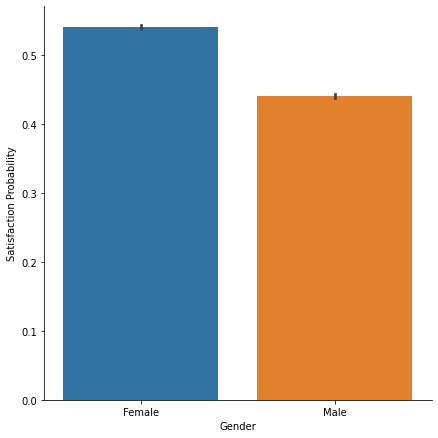

In [55]:
g=sns.catplot(x="Gender",y="satisfaction",data=df_train,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Females and males satisfaction probability are not equal. Male 57%, Female 43% satisfaction.

## Age-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


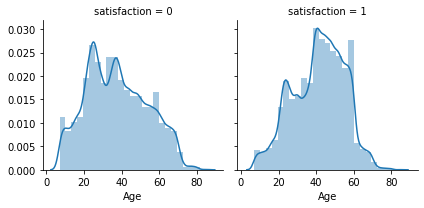

In [56]:
g= sns.FacetGrid(df_train,col="satisfaction")
g.map(sns.distplot,"Age",bins=25)
plt.show()
# 0=neutral or dissatisfied, 1=satisfied 

* 0-20 years old is generally neutral or dissatisfied with the flight.
* 30-60 years old is generally satisfied with the flight.
* 65-80 years old passengers is neutral or dissatisfied.

## Customer Type-->Satisfaction

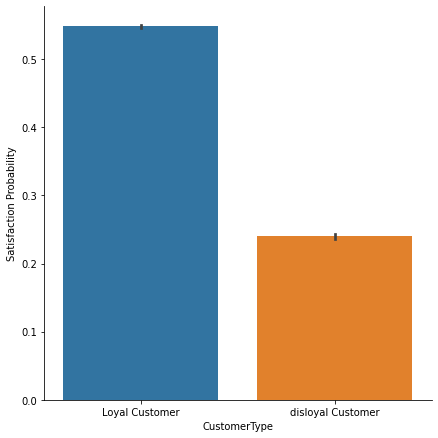

In [58]:
g=sns.factorplot(x="CustomerType",y="satisfaction",data=df_train,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Disloyal customer is generally neutral or dissatisfied with the flight.

## Type of Travel-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


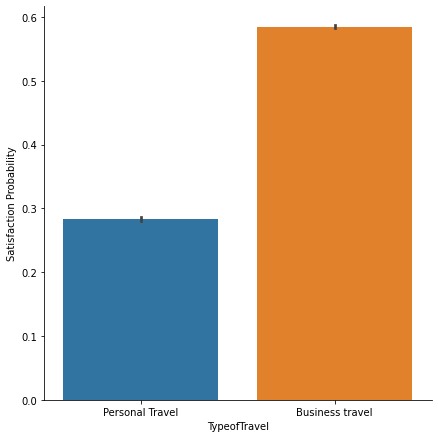

In [59]:
g=sns.factorplot(x="TypeofTravel",y="satisfaction",data=df_train,kind="bar",size=6)
g.set_ylabels("Satisfaction Probability")
plt.show()

* Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.
* Personal travel is %90 neutral or dissatisfied with the flight.

## Class-->Satisfaction

C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


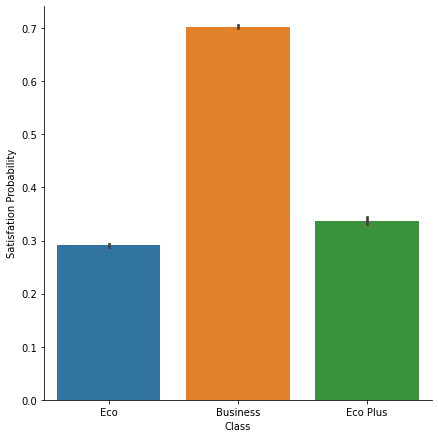

In [60]:
g=sns.factorplot(x="Class",y="satisfaction",data=df_train,kind="bar",size=6)
g.set_ylabels("Satisfation Probability")
plt.show()

* Business class is also happy here. But eco and eco plus  neutral or dissatisfied with the flight. 

## Gender-->Age-->Satisfaction

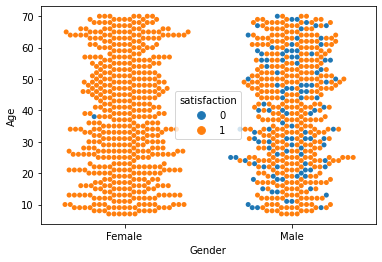

In [61]:
sns.swarmplot(x="Gender", y="Age",hue="satisfaction", data=df_train.head(1000))
plt.show()
# 0=neutral or dissatisfied, 1=satisfied  

# Personal Travel Analysis
* Personal travel is generally neutral or dissatisfied with the flight.

In [62]:
personal=df_train[df_train.TypeofTravel=="PersonalTravel"]
personal.head()

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes


## Aircraft Specifications Scoring

In [61]:
def flight_plot(variable):
    
    var=personal[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

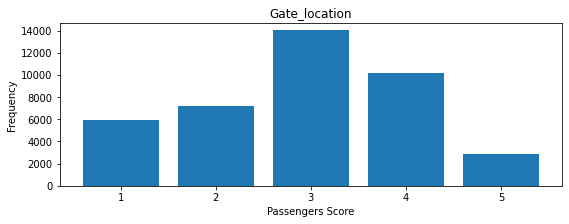

Gate_location: 
 3    14010
4    10131
2     7217
1     5948
5     2881
Name: Gate_location, dtype: int64


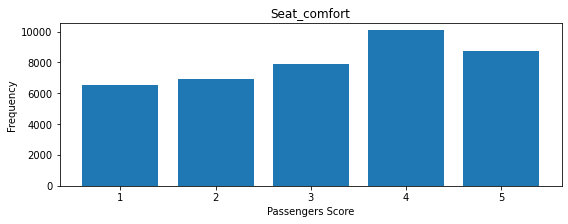

Seat_comfort: 
 4    10071
5     8771
3     7876
2     6946
1     6523
Name: Seat_comfort, dtype: int64


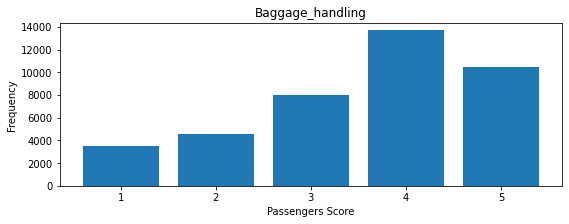

Baggage_handling: 
 4    13681
5    10464
3     7988
2     4563
1     3491
Name: Baggage_handling, dtype: int64


In [62]:
flight=["Gate_location", "Seat_comfort", "Baggage_handling"]

for c in flight:
    flight_plot(c)

* The gate position of the plane is not liked.
* Seat comfort is also not liked.

<AxesSubplot:title={'center':'Correlation with Satisfied Customer'}>

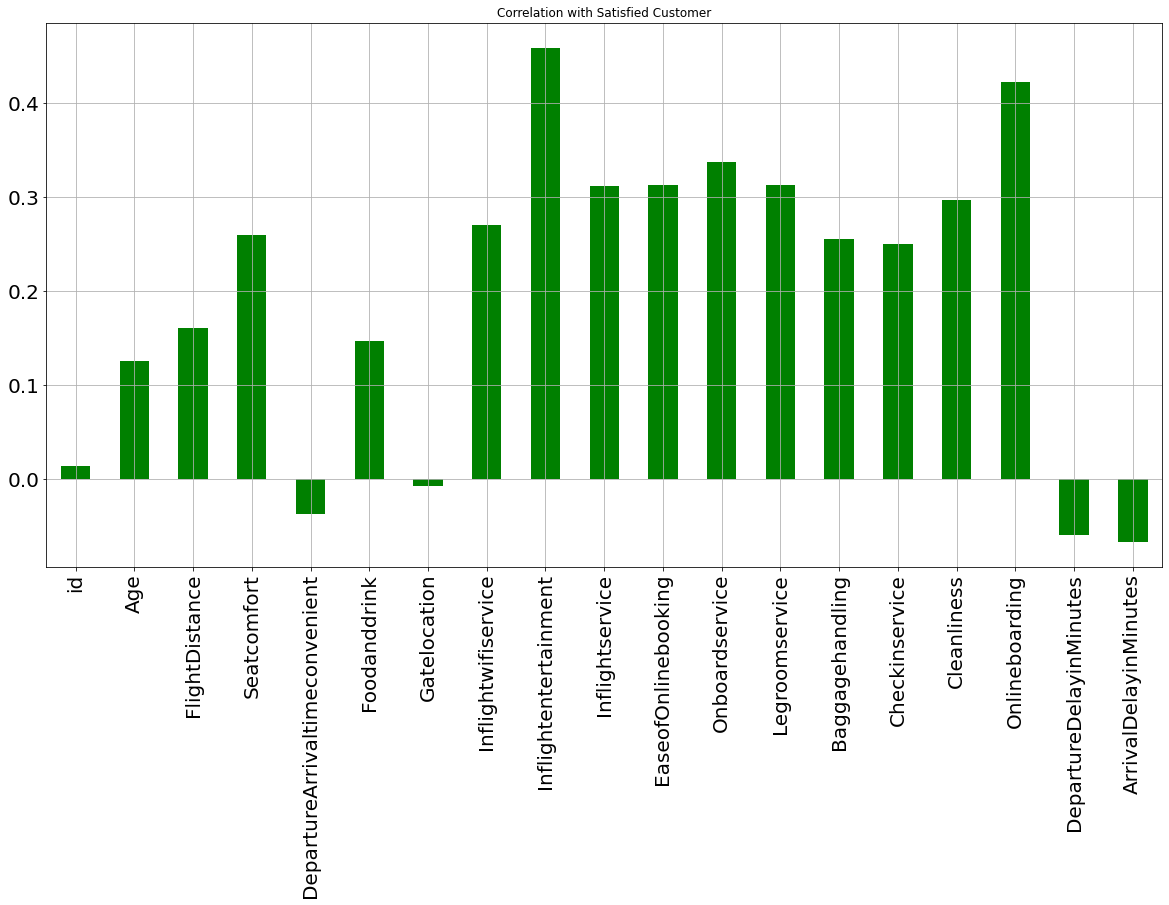

In [71]:
# Finding correlation of satisfaction with the features
X = df_train.drop(['satisfaction'],axis=1)
X.corrwith(df_train['satisfaction']).plot.bar(figsize=(20,10), title="Correlation with Satisfied Customer",
                                                   fontsize=20,rot=90,grid=True,color='g')

# Feature Engineering 

## Customer Type

In [72]:
df_train.head()

,id,satisfaction,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,...,Inflightservice,EaseofOnlinebooking,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,11112,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


<AxesSubplot:xlabel='CustomerType', ylabel='count'>

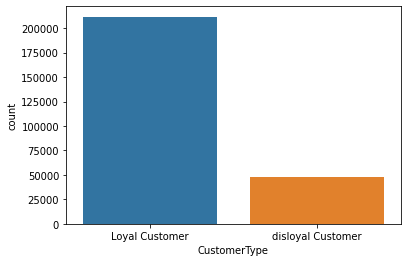

In [74]:
sns.countplot(x="CustomerType",data=df_train)

## One-hot Encoding for Categorical Variables

In [75]:
df_train=pd.get_dummies(df_train,columns=["CustomerType"])
df_train.head()

,id,satisfaction,Gender,Age,TypeofTravel,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,...,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer
0,11112,1,Female,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0.0,1,0
1,110278,1,Male,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,305.0,1,0
2,103199,1,Female,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0.0,1,0
3,47462,1,Female,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0.0,1,0
4,120011,1,Female,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0.0,1,0


## Type of Travel

In [77]:
df_train.TypeofTravel.head()

0    Personal Travel
1    Personal Travel
2    Personal Travel
3    Personal Travel
4    Personal Travel
Name: TypeofTravel, dtype: object

<AxesSubplot:xlabel='TypeofTravel', ylabel='count'>

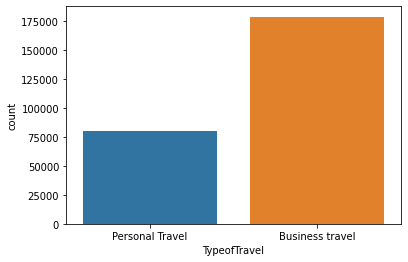

In [78]:
sns.countplot(x="TypeofTravel",data=df_train)

In [79]:
# one-hot encoding for categorical variables
df_train=pd.get_dummies(df_train,columns=["TypeofTravel"])
df_train.head()

,id,satisfaction,Gender,Age,Class,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,...,Baggagehandling,Checkinservice,Cleanliness,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeofTravel_Business travel,TypeofTravel_Personal Travel
0,11112,1,Female,65,Eco,265,0,0,0,2,...,3,5,3,2,0,0.0,1,0,0,1
1,110278,1,Male,47,Business,2464,0,0,0,3,...,4,2,3,2,310,305.0,1,0,0,1
2,103199,1,Female,15,Eco,2138,0,0,0,3,...,4,4,4,2,0,0.0,1,0,0,1
3,47462,1,Female,60,Eco,623,0,0,0,3,...,1,4,1,3,0,0.0,1,0,0,1
4,120011,1,Female,70,Eco,354,0,0,0,3,...,2,4,2,5,0,0.0,1,0,0,1


## Class

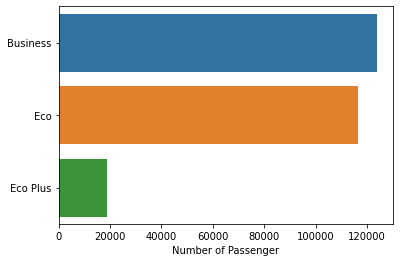

In [80]:
sns.barplot(x=df_train.Class.value_counts().values,y=df_train.Class.value_counts().index)
plt.xlabel("Number of Passenger")
plt.show()

In [81]:
# one-hot encoding for categorical variables
df_train=pd.get_dummies(df_train,columns=["Class"])
df_train.head()

,id,satisfaction,Gender,Age,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,...,Onlineboarding,DepartureDelayinMinutes,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeofTravel_Business travel,TypeofTravel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,11112,1,Female,65,265,0,0,0,2,2,...,2,0,0.0,1,0,0,1,0,1,0
1,110278,1,Male,47,2464,0,0,0,3,0,...,2,310,305.0,1,0,0,1,1,0,0
2,103199,1,Female,15,2138,0,0,0,3,2,...,2,0,0.0,1,0,0,1,0,1,0
3,47462,1,Female,60,623,0,0,0,3,3,...,3,0,0.0,1,0,0,1,0,1,0
4,120011,1,Female,70,354,0,0,0,3,4,...,5,0,0.0,1,0,0,1,0,1,0


## Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

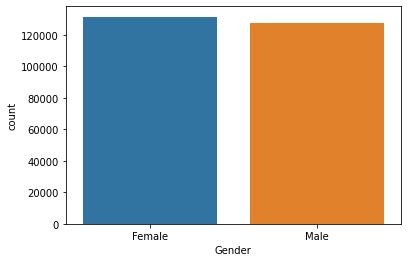

In [82]:
sns.countplot(x="Gender",data=df_train)

In [83]:
# one-hot encoding for categorical variables
df_train=pd.get_dummies(df_train,columns=["Gender"])
df_train.head()

,id,satisfaction,Age,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,...,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeofTravel_Business travel,TypeofTravel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
0,11112,1,65,265,0,0,0,2,2,4,...,0.0,1,0,0,1,0,1,0,1,0
1,110278,1,47,2464,0,0,0,3,0,2,...,305.0,1,0,0,1,1,0,0,0,1
2,103199,1,15,2138,0,0,0,3,2,0,...,0.0,1,0,0,1,0,1,0,1,0
3,47462,1,60,623,0,0,0,3,3,4,...,0.0,1,0,0,1,0,1,0,1,0
4,120011,1,70,354,0,0,0,3,4,3,...,0.0,1,0,0,1,0,1,0,1,0


## Drop ID

In [84]:
df_train.drop(labels=["id"],axis=1,inplace=True)

In [85]:
df_train.head().transpose()

,0,1,2,3,4
satisfaction,1.0,1.0,1.0,1.0,1.0
Age,65.0,47.0,15.0,60.0,70.0
FlightDistance,265.0,2464.0,2138.0,623.0,354.0
Seatcomfort,0.0,0.0,0.0,0.0,0.0
DepartureArrivaltimeconvenient,0.0,0.0,0.0,0.0,0.0
Foodanddrink,0.0,0.0,0.0,0.0,0.0
Gatelocation,2.0,3.0,3.0,3.0,3.0
Inflightwifiservice,2.0,0.0,2.0,3.0,4.0
Inflightentertainment,4.0,2.0,0.0,4.0,3.0
Inflightservice,2.0,2.0,2.0,3.0,4.0


In [86]:
#renaming columns for the ease of understanding
df_train.rename(columns={'Gender_Male':'Male','Gender_Female':'Female',
                        'Customer_Type_disloyal Customer':'Disloyal_Customer','Customer_Type_Loyal Customer':'Loyal_Customer',
                        'Type_of_Travel_Business travel':'Business_Travel','Type_of_Travel_Personal Travel':'Personal_Travel',
                        'Class_Business':'Business_Class','Class_Eco Plus':'EcoPlus_Class','Class_Eco':'Eco_Class'})

,satisfaction,Age,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Inflightservice,...,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeofTravel_Business travel,TypeofTravel_Personal Travel,Business_Class,Eco_Class,EcoPlus_Class,Female,Male
0,1,65,265,0,0,0,2,2,4,2,...,0.0,1,0,0,1,0,1,0,1,0
1,1,47,2464,0,0,0,3,0,2,2,...,305.0,1,0,0,1,1,0,0,0,1
2,1,15,2138,0,0,0,3,2,0,2,...,0.0,1,0,0,1,0,1,0,1,0
3,1,60,623,0,0,0,3,3,4,3,...,0.0,1,0,0,1,0,1,0,1,0
4,1,70,354,0,0,0,3,4,3,4,...,0.0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259109,1,35,2592,4,5,4,5,5,5,5,...,0.0,1,0,1,0,1,0,0,1,0
259110,1,11,610,5,1,5,1,5,5,5,...,65.0,1,0,1,0,0,1,0,1,0
259111,1,46,86,5,1,5,1,1,5,2,...,0.0,1,0,1,0,1,0,0,0,1
259112,1,35,83,5,1,5,1,1,5,5,...,0.0,1,0,1,0,1,0,0,1,0


## Principle Component Analysis (PCA)

<AxesSubplot:title={'center':'Correlation with Satisfied Customer'}>

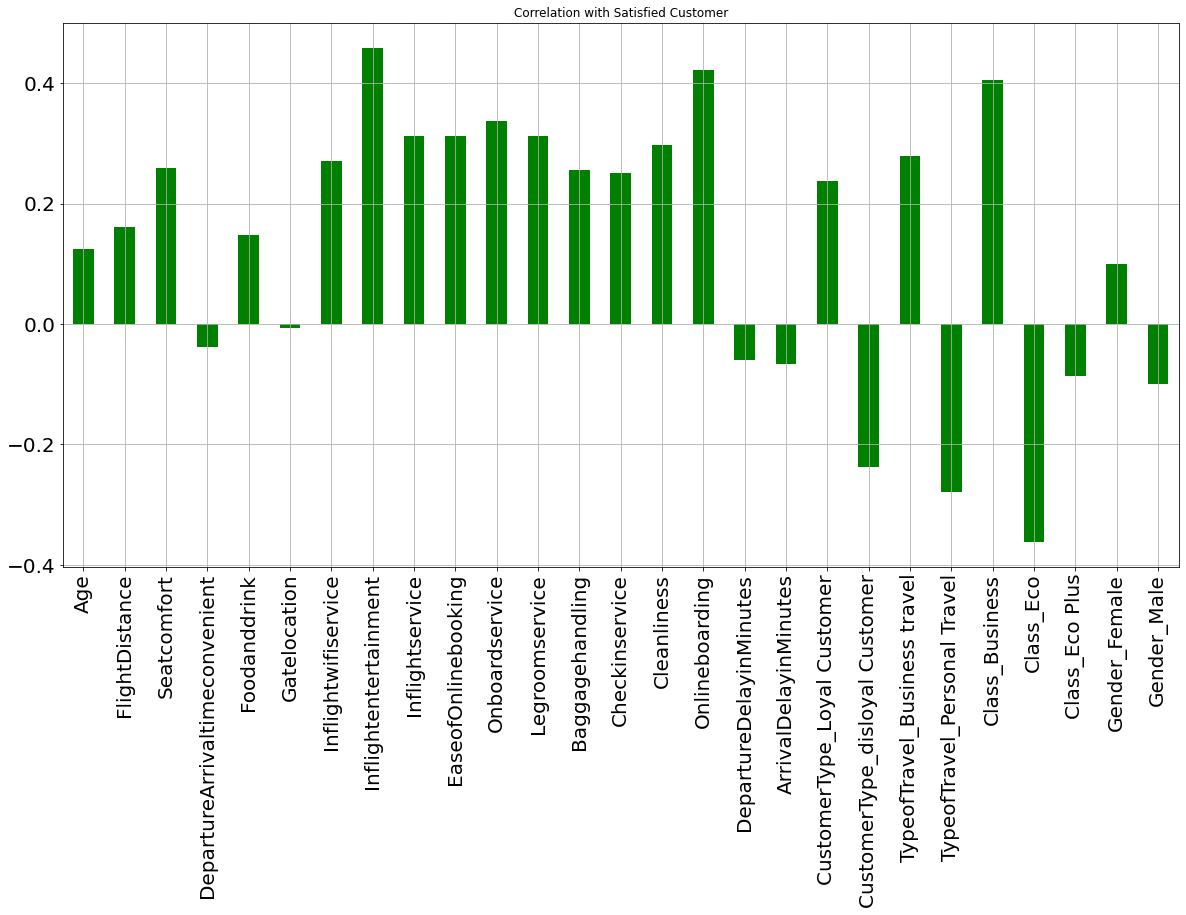

In [87]:
# Finding correlation of satisfaction with the features
X = df_train.drop(['satisfaction'],axis=1)
X.corrwith(df_train['satisfaction']).plot.bar(figsize=(20,10), title="Correlation with Satisfied Customer",
                                                   fontsize=20,rot=90,grid=True,color='g')

In [88]:
# Standardizing the data for PCA and other algorithms
x= StandardScaler().fit_transform(X)

In [89]:
# Two-component PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data= principalComponents, columns=['principal component 1','principal component 2'])
principalDf

,principal component 1,principal component 2
0,3.359503,-1.080950
1,2.745832,0.804316
2,3.777245,-0.559929
3,4.385005,-0.731840
4,3.000515,-1.207575
...,...,...
259109,-3.784234,-0.427984
259110,-0.842436,-0.260956
259111,0.351989,1.309626
259112,-1.887853,0.687381


In [90]:
# New dataframe created for 2-component PCA
finalDf = pd.concat([principalDf, df_train[['satisfaction']]], axis=1)

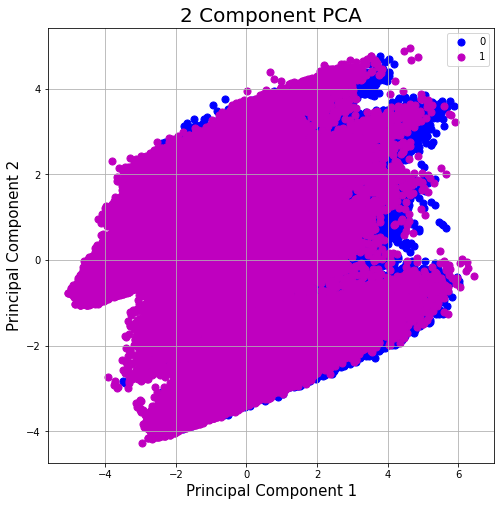

In [91]:
# Plot for identifying if the data is linearly separable
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)
targets = [0,1]
colors = ['b','m']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['satisfaction'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1']
              , finalDf.loc[indicesToKeep, 'principal component 2']
              , c=color
              , s=50)
ax.legend(targets)
ax.grid()

After centering and scaling the predictors we are doing 2 component Principle Component Analysis (PCA) on our data to see the spread for better visualization. From this we could see a lot of overlap in the classes and that the classes are not linearly separable and do not show any inherent clusters.

In [92]:
# PCA with all 20 features for elbow plot
pca2 = PCA(n_components=20)
principalComponents = pca2.fit_transform(x)

Text(0, 0.5, 'Explained Variance')

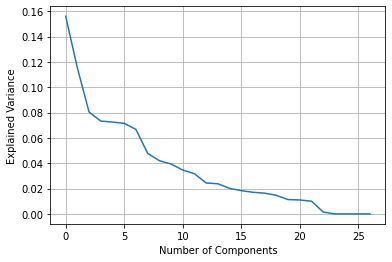

In [93]:
# Elbow plot
pca2 = PCA().fit(x)
plt.plot(pca2.explained_variance_ratio_)
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Further to do dimensionality reduction, we obtained the elbow plot with 20 components to identify how many features are redundant. From this PCA we found that the useful features are around 10. But since this resulted in half of the data being insignificant, we decided to use all 20 components so that no important distinguishing information is lost.

# Modeling
Algorithms that are used when creating the model;
* Logistic Regression
* Random Forest Classifer
* Decision Tree Classifer
* KNeighbors Classifer

## Train - Test Split

In [94]:
df_train_len

129234

In [95]:
test=df_train[df_train_len:]
test.drop(labels=["satisfaction"],axis=1,inplace=True)

C:\Users\sonal\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
test.head()

,Age,FlightDistance,Seatcomfort,DepartureArrivaltimeconvenient,Foodanddrink,Gatelocation,Inflightwifiservice,Inflightentertainment,Inflightservice,EaseofOnlinebooking,...,ArrivalDelayinMinutes,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeofTravel_Business travel,TypeofTravel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Gender_Female,Gender_Male
129234,56,369,3,2,3,4,0,3,4,0,...,0.0,0,1,0,1,0,1,0,0,1
129235,49,2486,3,2,2,4,0,2,3,1,...,0.0,0,1,0,1,0,1,0,0,1
129236,55,1448,3,3,3,4,0,3,3,0,...,0.0,0,1,0,1,0,1,0,0,1
129237,36,1501,4,4,4,3,0,4,5,0,...,0.0,0,1,0,1,0,1,0,1,0
129238,55,577,3,5,3,3,0,3,4,0,...,0.0,0,1,0,1,0,1,0,0,1


In [99]:
train=df_train[:df_train_len]
X_train=train.drop(labels="satisfaction",axis=1)
y_train=train["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 86586
X_test 42648
y_train 86586
y_test 42648
test 129880


## Simple Logistic Regression

In [100]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
acc_log_train=round(logreg.score(X_train,y_train)*100,2)
acc_log_test=round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 75.47
Test Accuracy: % 75.49


C:\Users\sonal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


* Our logistic regression model gives 75.4% correct results.
* 25% error margin is not good for this data.

## Confusion Matrix (Logistic Regression)

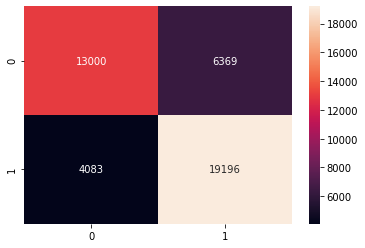

In [101]:
y_pred=logreg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

* In the confusion matrix we can see: 0:satisfied, 1: neutral or dissatisfied.

## Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 4 machine learning classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Decision Tree
* Random Forest
* KNN
* Logistic Regression

In [102]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [103]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  7.3min finished


0.9439862975432902
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 59.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 88.1min finished


0.9596355281076381
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   33.9s finished
C:\Users\sonal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.7869516775741514
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  5.3min finished


0.8033863916240633


C:\Users\sonal\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cross Validation Scores')

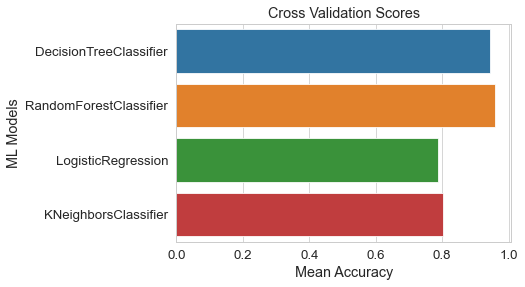

In [125]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9439862975432902,0.9596355281076381,0.7869516775741514,0.8033863916240633], "ML Models":["DecisionTreeClassifier","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

* DecisonTreeClassifier accuracy score: 94.3%
* RandomForestClassifier accuracy score: 96%
* LogisticRegression : 79%
* KNeighborsClassifier: 80.3%

## Ensemble Modeling
* We will combine 2 algorithms with the best value. Those will be random forest classifer and decision tree classifer.

In [105]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.9525182892515476


* Our model estimates 95.5% correctly. Our model works well.

## Prediction and Submission

In [106]:
test_satisfaction = pd.Series(votingC.predict(test), name = "satisfaction").astype(int)
results = pd.concat([df_test.id, test_satisfaction],axis = 1)
results.to_csv("satisfaction.csv", index = False)
results.head()

,id,satisfaction
0,117135,0
1,72091,0
2,29663,0
3,81849,0
4,83693,0


In [107]:
rf_pipe = Pipeline([('random_forest',RandomForestClassifier(n_estimators=500,max_depth=3,random_state=0))])

In [108]:
rf_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'random_forest', 'random_forest__bootstrap', 'random_forest__ccp_alpha', 'random_forest__class_weight', 'random_forest__criterion', 'random_forest__max_depth', 'random_forest__max_features', 'random_forest__max_leaf_nodes', 'random_forest__max_samples', 'random_forest__min_impurity_decrease', 'random_forest__min_impurity_split', 'random_forest__min_samples_leaf', 'random_forest__min_samples_split', 'random_forest__min_weight_fraction_leaf', 'random_forest__n_estimators', 'random_forest__n_jobs', 'random_forest__oob_score', 'random_forest__random_state', 'random_forest__verbose', 'random_forest__warm_start'])

In [109]:
param_grid_rf = {'random_forest__n_estimators':[100,200,300,400,500], 'random_forest__max_depth': [1,2,3,4,5]}

In [110]:
grid_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='f1')

In [111]:
fit_rf = grid_rf.fit(X_train,y_train)

In [112]:
# Scores
print(fit_rf.best_score_)
print(fit_rf.cv_results_['std_test_score'][fit_rf.best_index_])

0.910666295170578
0.002188485864837551


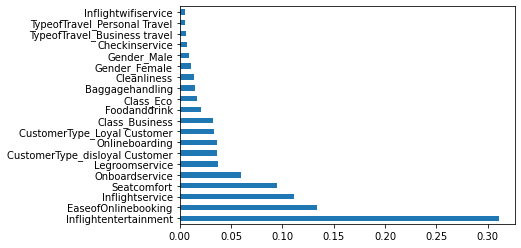

In [113]:
rfEstimator = RandomForestClassifier(n_estimators=600,max_depth=3,random_state=42)
rfEstimator.fit(X_test,y_test)
feat_importances= pd.Series(rfEstimator.feature_importances_,index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

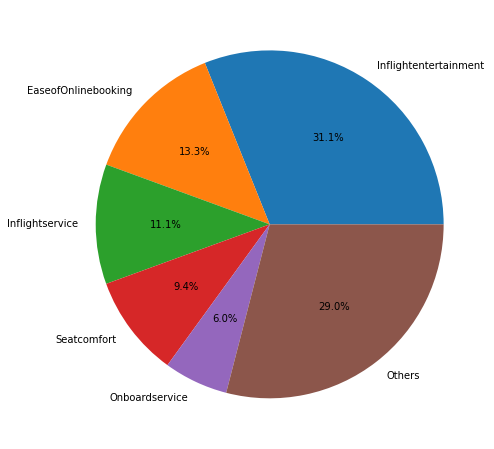

In [114]:
# Top 5 important features
top5 = pd.Series(feat_importances.nlargest(5))
top6 = top5.append(pd.Series([1 - np.sum(top5)],index=["Others"]))
top6.plot.pie(autopct = '%1.1f%%',subplots= True,figsize=(8,8))
plt.ylabel("")
plt.show()

The top 5 features obtained using the randomforest model are Inflightentertainment, EaseofOnlinebooking, Inflightservice, Seatcomfort and Onboardservice in the decreasing order of their impact on customer satisfaction as shown in the above visualization.

In [115]:
feat_importances

Age                               0.001067
FlightDistance                    0.003988
Seatcomfort                       0.094478
DepartureArrivaltimeconvenient    0.001183
Foodanddrink                      0.021105
Gatelocation                      0.000115
Inflightwifiservice               0.004708
Inflightentertainment             0.310761
Inflightservice                   0.111352
EaseofOnlinebooking               0.133439
Onboardservice                    0.059739
Legroomservice                    0.036773
Baggagehandling                   0.014739
Checkinservice                    0.006695
Cleanliness                       0.013599
Onlineboarding                    0.036212
DepartureDelayinMinutes           0.000072
ArrivalDelayinMinutes             0.000134
CustomerType_Loyal Customer       0.033185
CustomerType_disloyal Customer    0.036536
TypeofTravel_Business travel      0.006181
TypeofTravel_Personal Travel      0.005438
Class_Business                    0.031873
Class_Eco  

In [116]:
model = RandomForestClassifier()
n_estimators = [50, 75, 100]
max_features = ['sqrt', 'log2']
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
model_RandomForestClassifier = grid_search_RandomForestClassifier.fit(X_train, y_train)

print("Best: %f using %s" % (model_RandomForestClassifier.best_score_, model_RandomForestClassifier.best_params_))

Best: 0.956513 using {'max_features': 'sqrt', 'n_estimators': 75}


In [117]:
means = model_RandomForestClassifier.cv_results_['mean_test_score']
stds = model_RandomForestClassifier.cv_results_['std_test_score']
params = model_RandomForestClassifier.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.955936 (0.001899) with: {'max_features': 'sqrt', 'n_estimators': 50}
0.956513 (0.001796) with: {'max_features': 'sqrt', 'n_estimators': 75}
0.956452 (0.002162) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.954808 (0.001777) with: {'max_features': 'log2', 'n_estimators': 50}
0.954896 (0.001799) with: {'max_features': 'log2', 'n_estimators': 75}
0.955393 (0.001585) with: {'max_features': 'log2', 'n_estimators': 100}


In [118]:
model_RandomForestClassifier_cleared = grid_search_RandomForestClassifier.fit(X_train, y_train)
print("Result: %f" % (model_RandomForestClassifier_cleared.best_score_))

Result: 0.956794


In [119]:
def models_result(model, X_test, y_test):
    labels = model.predict(X_test)
    matrix = confusion_matrix(y_test, labels)
    sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    
    logit_roc_auc = roc_auc_score(y_test, labels)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show();
    
    print(classification_report(y_test, labels))

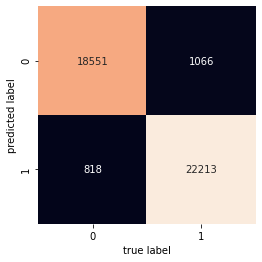

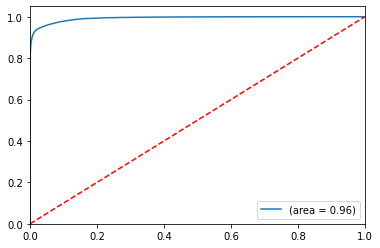

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     19369
           1       0.96      0.95      0.96     23279

    accuracy                           0.96     42648
   macro avg       0.96      0.96      0.96     42648
weighted avg       0.96      0.96      0.96     42648



In [120]:
models_result(model_RandomForestClassifier, X_test, y_test)

In [121]:
model_1 = RandomForestClassifier(n_estimators=250,max_depth=25, min_samples_leaf=0.000001, min_samples_split=0.000001)
model_1.fit(X_train,y_train)
prediction_test = model_1.predict(X_test)
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     19369
           1       0.97      0.96      0.96     23279

    accuracy                           0.96     42648
   macro avg       0.96      0.96      0.96     42648
weighted avg       0.96      0.96      0.96     42648



In [122]:
# file airlinepassenger.joblib is created
from joblib import dump, load
dump(model_1, 'airlinepassenger.joblib') 

['airlinepassenger.joblib']

Text(0.5, 1.0, 'Neutral or Dissatisfied vs Statisfied')

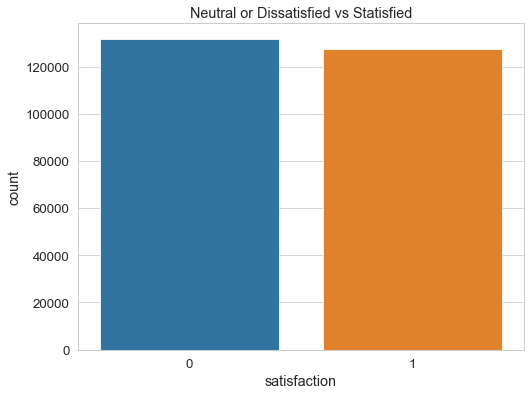

In [124]:
# Graph of neutral or dissatisfied vs satisfied customers
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.countplot(x='satisfaction', data = df_train).set_title('Neutral or Dissatisfied vs Statisfied')

## Conclusion: According to the visualization, randomforest is one of the best model for this particular problem. Accuracy is also very good as compared to the other models